In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
# Inputting the file
df = pd.read_csv('NY property data.csv')

In [3]:
# Looking at the firs 10 rows
df.head(10)

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,...,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,...,0,0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,...,0,0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709,...,709,564,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793,...,85,551,13644000.0,15750000.0,13644000.0,15750000.0,NaN,FINAL,2010/11,AC-TR
4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323,...,89,57,106348680.0,107758350.0,106348680.0,107758350.0,NaN,FINAL,2010/11,AC-TR
5,6,1000030002,1,3,2,NaN,PARKS AND RECREATION,Q1,4,496,...,0,0,4268700.0,4268700.0,4268700.0,4268700.0,NaN,FINAL,2010/11,AC-TR
6,7,1000030003,1,3,3,NaN,PARKS AND RECREATION,Q1,4,180,...,16,19,3546900.0,3546900.0,3546900.0,3546900.0,NaN,FINAL,2010/11,AC-TR
7,8,1000030010,1,3,10,NaN,DEPT RE-CITY OF NY,Z9,4,362,...,37,227,9882000.0,11304000.0,9882000.0,11304000.0,NaN,FINAL,2010/11,AC-TR
8,9,1000041001,1,4,1001,NaN,"TRZ HOLDINGS, LLC",R5,4,0,...,0,0,636093.0,2049290.0,NaN,NaN,NaN,FINAL,2010/11,AC-TR
9,10,1000041002,1,4,1002,NaN,"TRZ HOLDINGS, LLC",R5,4,0,...,0,0,919276.0,2961617.0,NaN,NaN,NaN,FINAL,2010/11,AC-TR


In [4]:
# Saving names of original columns in a list
cols_orig = df.columns

cols_orig

Index(['RECORD', 'BBLE', 'B', 'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL',
       'TAXCLASS', 'LTFRONT', 'LTDEPTH', 'EXT', 'STORIES', 'FULLVAL', 'AVLAND',
       'AVTOT', 'EXLAND', 'EXTOT', 'EXCD1', 'STADDR', 'ZIP', 'EXMPTCL',
       'BLDFRONT', 'BLDDEPTH', 'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2',
       'EXCD2', 'PERIOD', 'YEAR', 'VALTYPE'],
      dtype='object')

In [5]:
# Creating a temp copy to work with, to be used for backup/refresh (when required)
df_temp = df.copy()

In [6]:
# Ensuring all rows and columns are visible
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## 1. Filling missing Values

### 1.1 Filling ZIP values

In [7]:
# Counting number of empty ZIPs in the data
df_temp['ZIP'].isna().sum()

29890

In [8]:
# Defining mode function to calculate the zip value with highest frequency
# If there is no mode value for that group, replace with 1
def modex(x):
    m = pd.Series.mode(x)
    if m.empty:
        x = np.array(range(1,11))
        return x[0]
    else:
        return m.values[0]

# Definig count function to calculate the frequency of mod value of each group
def countx(x):
    return x.value_counts().head(1)
    
# Grouping values by 'B' and 'BLOCK' variable and using above two function to create helper dataframe
# The helper dataframe would have the mod value of ZIP for each group
df_zip_group = df_temp.groupby(['B','BLOCK'])['ZIP']\
                .agg({'ZIP':modex, 'Count':countx}).reset_index()

C:\Users\akash\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)



In [9]:
# Looking at the first 100 values
df_zip_group.head(100)

,B,BLOCK,ZIP,Count
0,1,1,10004.0,2
1,1,2,10004.0,2
2,1,3,10004.0,4
3,1,4,10004.0,53
4,1,5,10004.0,9
5,1,6,10004.0,2
6,1,7,10004.0,15
7,1,8,10004.0,6
8,1,9,10004.0,4
9,1,10,10004.0,8


In [10]:
# For the groups with no mod value, compare the frequency of group one below and one above
# Insert the ZIP value of the group with higher frequency

for i in range(len(df_zip_group)):
    if (df_zip_group.loc[i,'ZIP']==1):
        if df_zip_group.loc[i-1,'Count'] > df_zip_group.loc[i+1,'Count']:
            val = df_zip_group.loc[i-1,'ZIP']
        else:
            val = df_zip_group.loc[i+1,'ZIP']
        df_zip_group.loc[i,'ZIP'] = val

C:\Users\akash\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  


In [11]:
# Checking first 100 values of the helper dataframe
df_zip_group.head(100)

,B,BLOCK,ZIP,Count
0,1,1,10004.0,2
1,1,2,10004.0,2
2,1,3,10004.0,4
3,1,4,10004.0,53
4,1,5,10004.0,9
5,1,6,10004.0,2
6,1,7,10004.0,15
7,1,8,10004.0,6
8,1,9,10004.0,4
9,1,10,10004.0,8


In [12]:
# Defining fill_mode function which fills the records with missing ZIP value through helper dataframe

def fill_mode(x):
    if pd.isnull(x['ZIP']):
        return df_zip_group[(df_zip_group['B']==x['B'])&(df_zip_group['BLOCK']==x['BLOCK'])]['ZIP'].values[0]
    else:
        return x['ZIP']

In [13]:
# Using the function to fill the empty ZIP values
df_temp['ZIP'] = df_temp.apply(fill_mode, axis =1)

In [14]:
# Checking if there are any ZIP values remaining with NA value
df_temp['ZIP'].isna().sum()

0

In [15]:
# Manually checking one or two occurences to check if formula worked correctly
df_temp[(df_temp['B']==1) & (df_temp['BLOCK']==36)]['ZIP']

6092    10005.0
6093    10005.0
6094    10005.0
6095    10005.0
Name: ZIP, dtype: float64

df_temp.to_csv('NY_ZIP.csv')

In [16]:
df_temp['ZIP'] = df_temp['ZIP'].astype(int).astype(str)

In [17]:
df_temp2 = df_temp.copy()

In [18]:
df_temp2 = pd.read_csv('NY_ZIP.csv')

### 1.2 Filling missing FULLVAL, AVLAND, AVTOT, BLDFRONT, BLDDEPTH, LTFRONT and LTDEPTH values

In [19]:
# Replacing emoty values with NaN values to ensure fillna function works in later steps
df_temp2.replace(0, np.nan, inplace = True)

In [20]:
# Defining list of the variables to be filled, would be helpful in running loop
list_fill = ['FULLVAL', 'AVLAND', 'AVTOT', 'BLDFRONT', 'BLDDEPTH', 'LTFRONT', 'LTDEPTH']

# Counting number of NA values for each of the three variables
for i in list_fill:
    print(i, "Number of empty values:", df_temp2[i].isna().sum())

FULLVAL Number of empty values: 13007
AVLAND Number of empty values: 13009
AVTOT Number of empty values: 13007
BLDFRONT Number of empty values: 228815
BLDDEPTH Number of empty values: 228853
LTFRONT Number of empty values: 169108
LTDEPTH Number of empty values: 170128


In [21]:
# Fill the empty records with ZIP and BLDGCL group median if the group size is greater than or equal to 5
for i in list_fill:
    df_temp2[i]=df_temp2.groupby(['ZIP','BLDGCL'])[i].apply(lambda x: x.fillna(x.median()) if len(x)>=5 else x)

In [22]:
# Counting number of NA values for each of the three variables
for i in list_fill:
    print(i, "Number of empty values:", df_temp2[i].isna().sum())

FULLVAL Number of empty values: 10294
AVLAND Number of empty values: 10294
AVTOT Number of empty values: 10294
BLDFRONT Number of empty values: 75202
BLDDEPTH Number of empty values: 75218
LTFRONT Number of empty values: 16025
LTDEPTH Number of empty values: 17764


In [23]:
# Fill the empty records with ZIP and TAXCLASS group median if the group size is greater than or equal to 5
for i in list_fill:
    df_temp2[i]=df_temp2.groupby(['ZIP','TAXCLASS'])[i].apply(lambda x: x.fillna(x.median()) if len(x)>=5 else x)

In [24]:
# Counting number of NA values for each of the three variables
for i in list_fill:
    print(i, "Number of empty values:", df_temp2[i].isna().sum())

FULLVAL Number of empty values: 3915
AVLAND Number of empty values: 3915
AVTOT Number of empty values: 3915
BLDFRONT Number of empty values: 31226
BLDDEPTH Number of empty values: 31130
LTFRONT Number of empty values: 3092
LTDEPTH Number of empty values: 3146


In [25]:
# Fill the empty records with B and TAXCLASS group median if the group size is greater than or equal to 5
for i in list_fill:
    df_temp2[i]=df_temp2.groupby(['B','TAXCLASS'])[i].apply(lambda x: x.fillna(x.median()) if len(x)>=5 else x)

In [26]:
# Counting number of NA values for each of the three variables
for i in list_fill:
    print(i, "Number of empty values:", df_temp2[i].isna().sum())

FULLVAL Number of empty values: 678
AVLAND Number of empty values: 678
AVTOT Number of empty values: 678
BLDFRONT Number of empty values: 22317
BLDDEPTH Number of empty values: 18831
LTFRONT Number of empty values: 2
LTDEPTH Number of empty values: 2


In [27]:
# Fill the empty records with B group median if the group size is greater than or equal to 5
for i in list_fill:
    df_temp2[i]=df_temp2.groupby(['B'])[i].apply(lambda x: x.fillna(x.median()) if len(x)>=5 else x)

In [28]:
# Counting number of NA values for each of the three variables
for i in list_fill:
    print(i, "Number of empty values:", df_temp2[i].isna().sum())

FULLVAL Number of empty values: 0
AVLAND Number of empty values: 0
AVTOT Number of empty values: 0
BLDFRONT Number of empty values: 0
BLDDEPTH Number of empty values: 0
LTFRONT Number of empty values: 0
LTDEPTH Number of empty values: 0


### 1.3 Filling missing STORIES values

In [29]:
# Fill the empty records with ZIP and BLDGCL group median if the group size is greater than or equal to 5
df_temp2['STORIES']=df_temp2.groupby(['ZIP','BLDGCL'])['STORIES'].apply(lambda x: x.fillna(x.median()) if len(x)>=5 else x)

In [30]:
# Counting number of NA values for 'STORIES' variable
print('STORIES', "Number of empty values:", df_temp2['STORIES'].isna().sum())

STORIES Number of empty values: 42102


In [31]:
# Fill the empty records with BLDGCL group median if the group size is greater than or equal to 5
df_temp2['STORIES']=df_temp2.groupby(['BLDGCL'])['STORIES'].apply(lambda x: x.fillna(x.median()) if len(x)>=5 else x)

In [32]:
# Counting number of NA values for 'STORIES' variable
print('STORIES', "Number of empty values:", df_temp2['STORIES'].isna().sum())

STORIES Number of empty values: 4280


In [33]:
# Fill the empty records with TAXCLASS group median if the group size is greater than or equal to 5
df_temp2['STORIES']=df_temp2.groupby(['TAXCLASS'])['STORIES'].apply(lambda x: x.fillna(x.median()) if len(x)>=5 else x)

In [34]:
# Counting number of NA values for 'STORIES' variable
print('STORIES', "Number of empty values:", df_temp2['STORIES'].isna().sum())

STORIES Number of empty values: 0


In [35]:
# Saving the dataframe to csv for backup
df_temp2.to_csv('Final_processed.csv')

## 2. Creating Expert Variables

In [36]:
# Creating a copy of the dataframe, treating it as a backup point for data refresh if needed
df_proc = df_temp2.copy()

In [37]:
# Calculating S1 variable
df_proc['S1'] = df_proc['LTFRONT']*df_proc['LTDEPTH']

In [38]:
# 10 observations of S1 variable to check for the calculations
df_proc[['S1', 'LTFRONT', 'LTDEPTH']].head(10)

,S1,LTFRONT,LTDEPTH
0,523000.0,500.0,1046.0
1,9585.0,27.0,355.0
2,399876.0,709.0,564.0
3,436943.0,793.0,551.0
4,406980.0,323.0,1260.0
5,37696.0,496.0,76.0
6,66600.0,180.0,370.0
7,64074.0,362.0,177.0
8,149810.0,422.0,355.0
9,149810.0,422.0,355.0


In [39]:
# Calculating S2 variable
df_proc['S2'] = df_proc['BLDFRONT']*df_proc['BLDDEPTH']

In [40]:
# 10 observations of S2 variable to check for the calculations
df_proc[['S2', 'BLDFRONT', 'BLDDEPTH']].head(10)

,S2,BLDFRONT,BLDDEPTH
0,121476.0,382.0,318.0
1,121476.0,382.0,318.0
2,399876.0,709.0,564.0
3,46835.0,85.0,551.0
4,5073.0,89.0,57.0
5,121476.0,382.0,318.0
6,304.0,16.0,19.0
7,8399.0,37.0,227.0
8,121476.0,382.0,318.0
9,121476.0,382.0,318.0


In [41]:
# Calculating S3 variable
df_proc['S3'] = df_proc['S2']*df_proc['STORIES']

In [42]:
# 10 observations of S3 variable to check for the calculations
df_proc[['S3', 'S2', 'STORIES']].head(10)

,S3,S2,STORIES
0,485904.0,121476.0,4.0
1,121476.0,121476.0,1.0
2,1199628.0,399876.0,3.0
3,93670.0,46835.0,2.0
4,5073.0,5073.0,1.0
5,121476.0,121476.0,1.0
6,304.0,304.0,1.0
7,25197.0,8399.0,3.0
8,6073800.0,121476.0,50.0
9,6073800.0,121476.0,50.0


In [43]:
# Creating R1 to R10 variables using S1, S2, S3, FULLVAL, AVLAND and AVTOT
k = 1
for i in ['FULLVAL', 'AVLAND', 'AVTOT']:
    for j in ['S1','S2','S3']:
        str_r = 'R'+str(k)
        df_proc[str_r] = df_proc[i]/df_proc[j]
        print ('Combination Check:', str_r, i, j)
        k+=1

Combination Check: R1 FULLVAL S1
Combination Check: R2 FULLVAL S2
Combination Check: R3 FULLVAL S3
Combination Check: R4 AVLAND S1
Combination Check: R5 AVLAND S2
Combination Check: R6 AVLAND S3
Combination Check: R7 AVTOT S1
Combination Check: R8 AVTOT S2
Combination Check: R9 AVTOT S3


In [44]:
# 10 observations of R1-10 variables to check for the calculations
df_proc.head(10)

,Unnamed: 0,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,S1,S2,S3,R1,R2,R3,R4,R5,R6,R7,R8,R9
0,NaN,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500.0,1046.0,NaN,4.0,21400000.0,4225500.0,9630000.0,4225500.0,9630000.0,4600.0,1 LIBERTY ISLAND,10004.0,X3,382.0,318.0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR,523000.0,121476.0,485904.0,40.917782,176.166486,44.041621,8.079350,34.784649,8.696162,18.413002,79.274919,19.818730
1,1.0,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27.0,355.0,NaN,1.0,193800000.0,14310000.0,87210000.0,14310000.0,87210000.0,4600.0,1 ELLIS ISLAND,10004.0,X3,382.0,318.0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR,9585.0,121476.0,121476.0,20219.092332,1595.376865,1595.376865,1492.957746,117.801047,117.801047,9098.591549,717.919589,717.919589
2,2.0,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709.0,564.0,E,3.0,104686000.0,39008700.0,47108700.0,39008700.0,47108700.0,2191.0,MARGINAL STREET,10004.0,X1,709.0,564.0,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR,399876.0,399876.0,1199628.0,261.796157,261.796157,87.265386,97.551991,97.551991,32.517330,117.808271,117.808271,39.269424
3,3.0,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793.0,551.0,NaN,2.0,39200000.0,15255000.0,17640000.0,15255000.0,17640000.0,2191.0,PIER 6,10004.0,X1,85.0,551.0,13644000.0,15750000.0,13644000.0,15750000.0,NaN,FINAL,2010/11,AC-TR,436943.0,46835.0,93670.0,89.714219,836.980890,418.490445,34.913021,325.717946,162.858973,40.371399,376.641401,188.320700
4,4.0,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323.0,1260.0,NaN,1.0,272300000.0,121050000.0,122535000.0,121050000.0,122535000.0,2231.0,BATTERY PARK,10004.0,X1,89.0,57.0,106348680.0,107758350.0,106348680.0,107758350.0,NaN,FINAL,2010/11,AC-TR,406980.0,5073.0,5073.0,669.074647,53676.325646,53676.325646,297.434763,23861.620343,23861.620343,301.083591,24154.346541,24154.346541
5,5.0,6,1000030002,1,3,2,NaN,PARKS AND RECREATION,Q1,4,496.0,76.0,NaN,1.0,10600000.0,4770000.0,4770000.0,4770000.0,4770000.0,2231.0,PETER MINUIT PLAZA,10004.0,X1,382.0,318.0,4268700.0,4268700.0,4268700.0,4268700.0,NaN,FINAL,2010/11,AC-TR,37696.0,121476.0,121476.0,281.196944,87.260035,87.260035,126.538625,39.267016,39.267016,126.538625,39.267016,39.267016
6,6.0,7,1000030003,1,3,3,NaN,PARKS AND RECREATION,Q1,4,180.0,370.0,NaN,1.0,8489997.0,3820499.0,3820499.0,3820499.0,3820499.0,2231.0,PETER MINUIT PLAZA,10004.0,X1,16.0,19.0,3546900.0,3546900.0,3546900.0,3546900.0,NaN,FINAL,2010/11,AC-TR,66600.0,304.0,304.0,127.477432,27927.621711,27927.621711,57.364850,12567.430921,12567.430921,57.364850,12567.430921,12567.430921
7,7.0,8,1000030010,1,3,10,NaN,DEPT RE-CITY OF NY,Z9,4,362.0,177.0,NaN,3.0,28100000.0,11070000.0,12645000.0,11070000.0,12645000.0,4600.0,1 SOUTH STREET,10004.0,X3,37.0,227.0,9882000.0,11304000.0,9882000.0,11304000.0,NaN,FINAL,2010/11,AC-TR,64074.0,8399.0,25197.0,438.555420,3345.636385,1115.212128,172.768986,1318.014049,439.338016,197.349939,1505.536373,501.845458
8,8.0,9,1000041001,1,4,1001,NaN,"TRZ HOLDINGS, LLC",R5,4,422.0,355.0,NaN,50.0,3944762.0,636093.0,1775143.0,NaN,NaN,NaN,1 WATER STREET,10004.0,NaN,382.0,318.0,636093.0,2049290.0,NaN,NaN,NaN,FINAL,2010/11,AC-TR,149810.0,121476.0,6073800.0,26.331767,32.473591,0.649472,4.245998,5.236368,0.104727,11.849296,14.613117,0.292262
9,9.0,10,1000041002,1,4,1002,NaN,"TRZ HOLDINGS, LLC",R5,4,422.0,355.0,NaN,50.0,5700930.0,919276.0,2565419.0,NaN,NaN,NaN,1 WATER STREET,10004.0,NaN,382.0,318.0,919276.0,2961617.0,NaN,NaN,NaN,FINAL,2010/11,AC-TR,149810.0,121476.0,6073800.0,38.054402,46.930505,0.938610,6.136279,7.567552,0.151351,17.124484,21.118731,0.422375


In [45]:
# Converting ZIP variable to string (text) format
df_proc['ZIP'] = df_proc['ZIP'].astype(int).astype(str)

# Calculating ZIP3 variable by slicing first three digits of ZIP variable
start,stop,step=0,3,1
df_proc['ZIP3']=df_proc['ZIP'].str.slice(start,stop,step)

In [46]:
# Creating list of variables which are to be grouped to calculate expert variables
list_groupby = ['ZIP', 'ZIP3', 'TAXCLASS', 'B']

In [47]:
# Creating list to store R1-10 variable names
r_list = ['R'+str(i) for i in range(1,10)]

# Loop which calculates final 40 expert variables by grouping based on list_groupby variables and mean of the group
# The final expert 40 variables are then calculated by dividing the actual row value with the mean of each of the groups
for i in list_groupby:
    for j in r_list:
        name_col = 'average_'+str(j)+'_g'+str(i)
        df_proc[name_col] = df_proc.groupby(i)[j].transform('mean')
        name_col_45 = str(j)+'_'+name_col
        df_proc[name_col_45] = df_proc[j]/df_proc[name_col]

In [48]:
# Looking at the 40 expert variables
df_proc.head(5)

,Unnamed: 0,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,S1,S2,S3,R1,R2,R3,R4,R5,R6,R7,R8,R9,ZIP3,average_R1_gZIP,R1_average_R1_gZIP,average_R2_gZIP,R2_average_R2_gZIP,average_R3_gZIP,R3_average_R3_gZIP,average_R4_gZIP,R4_average_R4_gZIP,average_R5_gZIP,R5_average_R5_gZIP,average_R6_gZIP,R6_average_R6_gZIP,average_R7_gZIP,R7_average_R7_gZIP,average_R8_gZIP,R8_average_R8_gZIP,average_R9_gZIP,R9_average_R9_gZIP,average_R1_gZIP3,R1_average_R1_gZIP3,average_R2_gZIP3,R2_average_R2_gZIP3,average_R3_gZIP3,R3_average_R3_gZIP3,average_R4_gZIP3,R4_average_R4_gZIP3,average_R5_gZIP3,R5_average_R5_gZIP3,average_R6_gZIP3,R6_average_R6_gZIP3,average_R7_gZIP3,R7_average_R7_gZIP3,average_R8_gZIP3,R8_average_R8_gZIP3,average_R9_gZIP3,R9_average_R9_gZIP3,average_R1_gTAXCLASS,R1_average_R1_gTAXCLASS,average_R2_gTAXCLASS,R2_average_R2_gTAXCLASS,average_R3_gTAXCLASS,R3_average_R3_gTAXCLASS,average_R4_gTAXCLASS,R4_average_R4_gTAXCLASS,average_R5_gTAXCLASS,R5_average_R5_gTAXCLASS,average_R6_gTAXCLASS,R6_average_R6_gTAXCLASS,average_R7_gTAXCLASS,R7_average_R7_gTAXCLASS,average_R8_gTAXCLASS,R8_average_R8_gTAXCLASS,average_R9_gTAXCLASS,R9_average_R9_gTAXCLASS,average_R1_gB,R1_average_R1_gB,average_R2_gB,R2_average_R2_gB,average_R3_gB,R3_average_R3_gB,average_R4_gB,R4_average_R4_gB,average_R5_gB,R5_average_R5_gB,average_R6_gB,R6_average_R6_gB,average_R7_gB,R7_average_R7_gB,average_R8_gB,R8_average_R8_gB,average_R9_gB,R9_average_R9_gB
0,NaN,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500.0,1046.0,NaN,4.0,21400000.0,4225500.0,9630000.0,4225500.0,9630000.0,4600.0,1 LIBERTY ISLAND,10004,X3,382.0,318.0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR,523000.0,121476.0,485904.0,40.917782,176.166486,44.041621,8.079350,34.784649,8.696162,18.413002,79.274919,19.818730,100,308.567411,0.132606,399.54316,0.440920,136.599794,0.322414,43.91237,0.183988,90.426622,0.384673,52.264394,0.166388,126.01684,0.146115,166.965375,0.474799,58.52076,0.338662,373.540679,0.109540,571.101853,0.308468,169.052608,0.260520,37.331803,0.216420,70.926034,0.490436,33.862166,0.256811,98.627086,0.186693,152.124795,0.521118,47.569836,0.416624,219.170893,0.186694,861.398717,0.204512,449.71508,0.097932,39.657134,0.203730,274.576789,0.126685,163.840149,0.053077,98.698597,0.186558,408.041766,0.194281,209.16395,0.094752,363.950199,0.112427,554.922709,0.317461,162.784056,0.270552,35.93064,0.224860,67.911275,0.512207,31.906732,0.272549,95.545234,0.192715,146.188725,0.542278,45.061308,0.439817
1,1.0,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27.0,355.0,NaN,1.0,193800000.0,14310000.0,87210000.0,14310000.0,87210000.0,4600.0,1 ELLIS ISLAND,10004,X3,382.0,318.0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR,9585.0,121476.0,121476.0,20219.092332,1595.376865,1595.376865,1492.957746,117.801047,117.801047,9098.591549,717.919589,717.919589,100,308.567411,65.525689,399.54316,3.993003,136.599794,11.679204,43.91237,33.998569,90.426622,1.302725,52.264394,2.253945,126.01684,72.201394,166.965375,4.299811,58.52076,12.267776,373.540679,54.128221,571.101853,2.793507,169.052608,9.437162,37.331803,39.991579,70.926034,1.660900,33.862166,3.478840,98.627086,92.252462,152.124795,4.719281,47.569836,15.091908,219.170893,92.252635,861.398717,1.852077,449.71508,3.547528,39.657134,37.646638,274.576789,0.429028,163.840149,0.719000,98.698597,92.185622,408.041766,1.759427,209.16395,3.432329,363.950199,55.554558,554.922709,2.874953,162.784056,9.800572,35.93064,41.551103,67.911275,1.734632,31.906732,3.692044,95.545234,95.228104,146.188725,4.910909,45.061308,15.932063
2,2.0,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709.0,564.0,E,3.0,104686000.0,39008700.0,47108700.0,39008700.0,47108700.0,2191.0,MARGINAL STREET,10004,X1,709.0,564.0,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR,399876.0,3

In [49]:
# Using the same procedure as above, however this time basing the calculation on column mean
for j in r_list:
    name_col = 'average_'+str(j)+'_gAll'
    df_proc[name_col] = df_proc[j].mean()
    name_col_45 = str(j)+'_'+name_col
    df_proc[name_col_45] = df_proc[j]/df_proc[name_col]

In [50]:
# Looking at the 45 expert variables
df_proc.head(5)

,Unnamed: 0,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,S1,S2,S3,R1,R2,R3,R4,R5,R6,R7,R8,R9,ZIP3,average_R1_gZIP,R1_average_R1_gZIP,average_R2_gZIP,R2_average_R2_gZIP,average_R3_gZIP,R3_average_R3_gZIP,average_R4_gZIP,R4_average_R4_gZIP,average_R5_gZIP,R5_average_R5_gZIP,average_R6_gZIP,R6_average_R6_gZIP,average_R7_gZIP,R7_average_R7_gZIP,average_R8_gZIP,R8_average_R8_gZIP,average_R9_gZIP,R9_average_R9_gZIP,average_R1_gZIP3,R1_average_R1_gZIP3,average_R2_gZIP3,R2_average_R2_gZIP3,average_R3_gZIP3,R3_average_R3_gZIP3,average_R4_gZIP3,R4_average_R4_gZIP3,average_R5_gZIP3,R5_average_R5_gZIP3,average_R6_gZIP3,R6_average_R6_gZIP3,average_R7_gZIP3,R7_average_R7_gZIP3,average_R8_gZIP3,R8_average_R8_gZIP3,average_R9_gZIP3,R9_average_R9_gZIP3,average_R1_gTAXCLASS,R1_average_R1_gTAXCLASS,average_R2_gTAXCLASS,R2_average_R2_gTAXCLASS,average_R3_gTAXCLASS,R3_average_R3_gTAXCLASS,average_R4_gTAXCLASS,R4_average_R4_gTAXCLASS,average_R5_gTAXCLASS,R5_average_R5_gTAXCLASS,average_R6_gTAXCLASS,R6_average_R6_gTAXCLASS,average_R7_gTAXCLASS,R7_average_R7_gTAXCLASS,average_R8_gTAXCLASS,R8_average_R8_gTAXCLASS,average_R9_gTAXCLASS,R9_average_R9_gTAXCLASS,average_R1_gB,R1_average_R1_gB,average_R2_gB,R2_average_R2_gB,average_R3_gB,R3_average_R3_gB,average_R4_gB,R4_average_R4_gB,average_R5_gB,R5_average_R5_gB,average_R6_gB,R6_average_R6_gB,average_R7_gB,R7_average_R7_gB,average_R8_gB,R8_average_R8_gB,average_R9_gB,R9_average_R9_gB,average_R1_gAll,R1_average_R1_gAll,average_R2_gAll,R2_average_R2_gAll,average_R3_gAll,R3_average_R3_gAll,average_R4_gAll,R4_average_R4_gAll,average_R5_gAll,R5_average_R5_gAll,average_R6_gAll,R6_average_R6_gAll,average_R7_gAll,R7_average_R7_gAll,average_R8_gAll,R8_average_R8_gAll,average_R9_gAll,R9_average_R9_gAll
0,NaN,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500.0,1046.0,NaN,4.0,21400000.0,4225500.0,9630000.0,4225500.0,9630000.0,4600.0,1 LIBERTY ISLAND,10004,X3,382.0,318.0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR,523000.0,121476.0,485904.0,40.917782,176.166486,44.041621,8.079350,34.784649,8.696162,18.413002,79.274919,19.818730,100,308.567411,0.132606,399.54316,0.440920,136.599794,0.322414,43.91237,0.183988,90.426622,0.384673,52.264394,0.166388,126.01684,0.146115,166.965375,0.474799,58.52076,0.338662,373.540679,0.109540,571.101853,0.308468,169.052608,0.260520,37.331803,0.216420,70.926034,0.490436,33.862166,0.256811,98.627086,0.186693,152.124795,0.521118,47.569836,0.416624,219.170893,0.186694,861.398717,0.204512,449.71508,0.097932,39.657134,0.203730,274.576789,0.126685,163.840149,0.053077,98.698597,0.186558,408.041766,0.194281,209.16395,0.094752,363.950199,0.112427,554.922709,0.317461,162.784056,0.270552,35.93064,0.224860,67.911275,0.512207,31.906732,0.272549,95.545234,0.192715,146.188725,0.542278,45.061308,0.439817,343.735061,0.119039,607.276406,0.290093,283.67069,0.155256,11.094569,0.728226,44.11249,0.788544,23.912472,0.363666,30.658337,0.600587,75.635641,1.048116,34.430619,0.575614
1,1.0,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27.0,355.0,NaN,1.0,193800000.0,14310000.0,87210000.0,14310000.0,87210000.0,4600.0,1 ELLIS ISLAND,10004,X3,382.0,318.0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR,9585.0,121476.0,121476.0,20219.092332,1595.376865,1595.376865,1492.957746,117.801047,117.801047,9098.591549,717.919589,717.919589,100,308.567411,65.525689,399.54316,3.993003,136.599794,11.679204,43.91237,33.998569,90.426622,1.302725,52.264394,2.253945,126.01684,72.201394,166.965375,4.299811,58.52076,12.267776,373.540679,54.128221,571.101853,2.793507,169.052608,9.437162,37.331803,39.991579,70.926034,1.660900,33.862166,3.478840,98.627086,92.252462,152.124795,4.719281,47.569836,15.091908,219.170893,92.252635,861.398717,1.852077,449.71508,3.547528,39.657134,37.646638,274.576789,0.429028,163.840149,0.719000,98

In [51]:
# Creating list of columns which are calculated, i.e. 45 expert variables
cols_created = []
for i in list_groupby:
    for j in r_list:
        cols_created.append(j+'_average_'+j+'_g'+i)

for j in r_list:
    cols_created.append(j+'_average_'+j+'_gAll')

In [52]:
# Forming a list of columns which includes the original columns and the expert variables
cols = list(cols_orig) + cols_created

In [53]:
# Creating the final dataframe with the required columns
df_final = df_proc[cols]

In [54]:
# Looking at the top 5 rows
df_final.head(5)

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,R1_average_R1_gZIP,R2_average_R2_gZIP,R3_average_R3_gZIP,R4_average_R4_gZIP,R5_average_R5_gZIP,R6_average_R6_gZIP,R7_average_R7_gZIP,R8_average_R8_gZIP,R9_average_R9_gZIP,R1_average_R1_gZIP3,R2_average_R2_gZIP3,R3_average_R3_gZIP3,R4_average_R4_gZIP3,R5_average_R5_gZIP3,R6_average_R6_gZIP3,R7_average_R7_gZIP3,R8_average_R8_gZIP3,R9_average_R9_gZIP3,R1_average_R1_gTAXCLASS,R2_average_R2_gTAXCLASS,R3_average_R3_gTAXCLASS,R4_average_R4_gTAXCLASS,R5_average_R5_gTAXCLASS,R6_average_R6_gTAXCLASS,R7_average_R7_gTAXCLASS,R8_average_R8_gTAXCLASS,R9_average_R9_gTAXCLASS,R1_average_R1_gB,R2_average_R2_gB,R3_average_R3_gB,R4_average_R4_gB,R5_average_R5_gB,R6_average_R6_gB,R7_average_R7_gB,R8_average_R8_gB,R9_average_R9_gB,R1_average_R1_gAll,R2_average_R2_gAll,R3_average_R3_gAll,R4_average_R4_gAll,R5_average_R5_gAll,R6_average_R6_gAll,R7_average_R7_gAll,R8_average_R8_gAll,R9_average_R9_gAll
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500.0,1046.0,NaN,4.0,21400000.0,4225500.0,9630000.0,4225500.0,9630000.0,4600.0,1 LIBERTY ISLAND,10004,X3,382.0,318.0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR,0.132606,0.440920,0.322414,0.183988,0.384673,0.166388,0.146115,0.474799,0.338662,0.109540,0.308468,0.260520,0.216420,0.490436,0.256811,0.186693,0.521118,0.416624,0.186694,0.204512,0.097932,0.203730,0.126685,0.053077,0.186558,0.194281,0.094752,0.112427,0.317461,0.270552,0.224860,0.512207,0.272549,0.192715,0.542278,0.439817,0.119039,0.290093,0.155256,0.728226,0.788544,0.363666,0.600587,1.048116,0.575614
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27.0,355.0,NaN,1.0,193800000.0,14310000.0,87210000.0,14310000.0,87210000.0,4600.0,1 ELLIS ISLAND,10004,X3,382.0,318.0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR,65.525689,3.993003,11.679204,33.998569,1.302725,2.253945,72.201394,4.299811,12.267776,54.128221,2.793507,9.437162,39.991579,1.660900,3.478840,92.252462,4.719281,15.091908,92.252635,1.852077,3.547528,37.646638,0.429028,0.719000,92.185622,1.759427,3.432329,55.554558,2.874953,9.800572,41.551103,1.734632,3.692044,95.228104,4.910909,15.932063,58.821734,2.627102,5.624045,134.566543,2.670469,4.926343,296.773816,9.491816,20.851196
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709.0,564.0,E,3.0,104686000.0,39008700.0,47108700.0,39008700.0,47108700.0,2191.0,MARGINAL STREET,10004,X1,709.0,564.0,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR,0.848425,0.655239,0.638840,2.221515,1.078797,0.622170,0.934861,0.705585,0.671034,0.700850,0.458405,0.516203,2.613107,1.375405,0.960285,1.194482,0.774419,0.825511,1.194484,0.303920,0.194046,2.459885,0.355281,0.198470,1.193616,0.288716,0.187745,0.719319,0.471770,0.536081,2.715008,1.436462,1.019137,1.233010,0.805864,0.871467,0.761622,0.431099,0.307629,8.792770,2.211437,1.359848,3.842618,1.557576,1.140538
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793.0,551.0,NaN,2.0,39200000.0,15255000.0,17640000.0,15255000.0,17640000.0,2191.0,PIER 6,10004,X1,85.0,551.0,13644000.0,15750000.0,13644000.0,15750000.0,NaN,FINAL,2010/11,AC-TR,0.290744,2.094845,3.063624,0.795061,3.602014,3.116060,0.320365,2.255805,3.218015,0.240173,1.465554,2.475504,0.935209,4.592361,4.809467,0.409334,2.475871,3.958826,0.409335,0.971653,0.930568,0.880372,1.186254,0.994011,0.409037,0.923046,0.900350,0.246501,1.508284,2.570832,0.971678,4.796228,5.104220,0.422537,2.576405,4.179211,0.260998,1.378254,1.475269,3.146857,7.383803,6.810629,1.316816,4.979681,5.469571
4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323.0,1260.0,NaN,1.0,272300000.0,121050000.0,122535000.0,121050000.0,122535000.0,2231.0,BATTERY PARK,10004,X1,89.0,57.0,106348680.0,107758350.0,106348680.0,107758350.0,NaN,FINAL,2010/11,AC-TR,2.168326,134.344249,392.945875,6.773371,263.878267,456.555954,2.

In [55]:
# Saving this dataframe for backup
df_final.to_csv('Final_data.csv')

In [56]:
df_final = pd.read_csv('Final_data.csv')

C:\Users\akash\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (2,6,9,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [57]:
# Creating a copy of this dataframe, can be used as a point to refresh when required
df = df_final.copy()

## 3. Creating Z scaled PCA Fraud Score

### 3.1 Z Scaling 45 variables

In [58]:
# Importing required libraries
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

In [59]:
# Selecting the 45 expert variables to be scaled and z scaling them
scaled_arr = scaler.fit_transform(df.iloc[:,-45:])

In [60]:
# Saving the z scaled columns in a dataframe
scaled_df = pd.DataFrame(scaled_arr, columns = cols_created)

In [61]:
# Looking at the top 5 observations
scaled_df.head(5)

,R1_average_R1_gZIP,R2_average_R2_gZIP,R3_average_R3_gZIP,R4_average_R4_gZIP,R5_average_R5_gZIP,R6_average_R6_gZIP,R7_average_R7_gZIP,R8_average_R8_gZIP,R9_average_R9_gZIP,R1_average_R1_gZIP3,R2_average_R2_gZIP3,R3_average_R3_gZIP3,R4_average_R4_gZIP3,R5_average_R5_gZIP3,R6_average_R6_gZIP3,R7_average_R7_gZIP3,R8_average_R8_gZIP3,R9_average_R9_gZIP3,R1_average_R1_gTAXCLASS,R2_average_R2_gTAXCLASS,R3_average_R3_gTAXCLASS,R4_average_R4_gTAXCLASS,R5_average_R5_gTAXCLASS,R6_average_R6_gTAXCLASS,R7_average_R7_gTAXCLASS,R8_average_R8_gTAXCLASS,R9_average_R9_gTAXCLASS,R1_average_R1_gB,R2_average_R2_gB,R3_average_R3_gB,R4_average_R4_gB,R5_average_R5_gB,R6_average_R6_gB,R7_average_R7_gB,R8_average_R8_gB,R9_average_R9_gB,R1_average_R1_gAll,R2_average_R2_gAll,R3_average_R3_gAll,R4_average_R4_gAll,R5_average_R5_gAll,R6_average_R6_gAll,R7_average_R7_gAll,R8_average_R8_gAll,R9_average_R9_gAll
0,-0.217642,-0.058083,-0.061874,-0.063673,-0.024200,-0.031534,-0.087295,-0.024959,-0.029884,-0.090878,-0.051638,-0.043504,-0.033289,-0.006590,-0.009640,-0.060232,-0.008147,-0.009841,-0.141901,-0.032287,-0.010859,-0.098582,-0.014261,-0.006837,-0.118500,-0.031582,-0.010875,-0.060567,-0.046552,-0.041157,-0.033691,-0.006001,-0.009110,-0.054825,-0.007588,-0.009502,-0.040192,-0.045643,-0.049198,-0.012697,-0.002692,-0.007698,-0.030665,0.000833,-0.006849
1,16.190473,0.310943,0.975171,2.574879,0.011906,0.047434,7.279154,0.156815,0.509155,5.422146,0.133923,0.496365,1.656476,0.008547,0.032152,6.757958,0.063275,0.237722,15.921190,0.034584,0.030668,4.537038,-0.009324,-0.002029,13.283676,0.029767,0.029220,3.722748,0.127880,0.496549,1.762530,0.009037,0.033714,6.399266,0.064835,0.253274,2.637975,0.104614,0.269305,6.240320,0.021270,0.047501,22.708403,0.147039,0.320354
2,-0.038033,-0.035817,-0.032979,0.095315,0.003099,-0.014292,-0.006659,-0.013991,-0.014865,-0.030531,-0.040442,-0.028462,0.068529,0.004855,-0.000515,0.014403,-0.003838,-0.002944,0.033932,-0.028252,-0.009702,0.180741,-0.010528,-0.005787,0.028206,-0.027880,-0.009758,-0.019153,-0.036028,-0.026175,0.074542,0.005369,0.000240,0.015824,-0.003218,-0.002180,-0.010875,-0.036577,-0.040324,0.364084,0.015425,0.004353,0.218246,0.009655,0.002268
3,-0.177963,0.113743,0.188440,-0.015991,0.102335,0.080045,-0.069481,0.059679,0.100225,-0.077546,0.034764,0.086805,-0.002753,0.046460,0.049411,-0.043743,0.025109,0.049914,-0.103056,-0.001151,-0.000836,-0.014811,0.003042,-0.000043,-0.086090,-0.003016,-0.001197,-0.051418,0.034667,0.088630,-0.001231,0.046701,0.051399,-0.039217,0.026134,0.053925,-0.033715,0.024320,0.027680,0.100303,0.081283,0.070297,0.024324,0.068910,0.072129
4,0.293151,13.853133,35.790522,0.450496,10.338813,17.232588,0.142026,6.827386,18.605602,0.080745,6.943474,18.620672,0.295992,4.338134,9.127059,0.152022,2.684264,8.548853,0.358152,2.488535,1.424803,0.804752,1.402810,1.044369,0.298717,2.281088,1.375258,0.057209,6.529051,18.548245,0.316335,4.310177,9.353199,0.146094,2.722560,9.075113,0.043181,5.618616,10.961996,1.205816,6.874744,12.060259,0.677213,5.512374,11.305086


### 3.2 Applying PCA on standardized variables

In [62]:
# Importing libary for PCA
from sklearn.decomposition import PCA

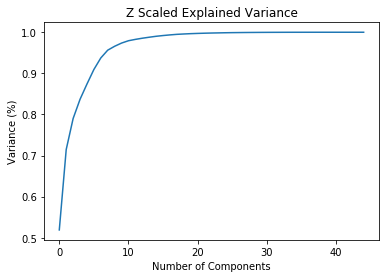

In [63]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(scaled_df)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Z Scaled Explained Variance')
plt.show()

In [64]:
# We can see that the curve starts to plateau at n=10
# Hence, we would have 10 PCA components
# Applying PCA on the 45 z scaled variables
pca = PCA(n_components = 10)
pca_arr = pca.fit_transform(scaled_df)

In [65]:
# Saving the PCA values in a dataframe
cols_PCA = ['PCA'+str(i) for i in range(1,11)]
scaled_pca_df = pd.DataFrame(pca_arr, columns = cols_PCA)

In [66]:
# Looking at 5 observations
scaled_pca_df.head(5)

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
0,-0.207717,-0.231146,-0.081573,-0.023571,-0.130766,-0.128464,-0.029962,-0.011359,0.049583,-0.012767
1,9.939462,28.230690,8.984823,2.315365,5.228271,6.246693,4.154905,-0.117596,10.982434,1.585800
2,0.035592,0.258255,-0.043357,0.134897,-0.062747,-0.040345,-0.054798,0.037246,0.349780,-0.023096
3,0.240134,-0.224975,-0.142711,-0.104380,-0.077456,0.063996,-0.112508,0.003166,0.132488,-0.011389
4,47.175832,-13.909460,-5.257431,-13.048712,-1.927284,27.105026,-12.979332,-7.328228,1.105914,2.555335


### 3.3 Applying Z scale on standardized PCA variables

In [67]:
# Applying z scaling on the standardized PCA values and saving it in a dataframe

Zscaled_PCA_arr = scaler.fit_transform(scaled_pca_df)

Zscaled_PCA_df = pd.DataFrame(Zscaled_PCA_arr, columns = cols_PCA)

Zscaled_PCA_df.head(5)

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
0,-0.042979,-0.077923,-0.044261,-0.016244,-0.101195,-0.101810,-0.026652,-0.012309,0.075882,-0.021559
1,2.056585,9.516983,4.875166,1.595641,4.045946,4.950620,3.695902,-0.127431,16.807314,2.677717
2,0.007364,0.087062,-0.023526,0.092965,-0.048557,-0.031974,-0.048744,0.040361,0.535296,-0.038999
3,0.049686,-0.075843,-0.077435,-0.071933,-0.059940,0.050718,-0.100079,0.003430,0.202757,-0.019232
4,9.761203,-4.689085,-2.852683,-8.992562,-1.491447,21.481234,-11.545472,-7.941133,1.692470,4.314835


### 3.4 Calculating Fraud Score

In [68]:
# Squaring the z scaled PCA values to calculate final fraud score
# We are calculating Euclidean distance here, hence squaring it by 2
for i in range(1,11):
    col_name = 'sq_Z'+str(i)
    pca_col_name = 'PCA'+str(i)
    Zscaled_PCA_df[col_name] = Zscaled_PCA_df[pca_col_name]**2 

In [69]:
Zscaled_PCA_df.head(5)

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,sq_Z1,sq_Z2,sq_Z3,sq_Z4,sq_Z5,sq_Z6,sq_Z7,sq_Z8,sq_Z9,sq_Z10
0,-0.042979,-0.077923,-0.044261,-0.016244,-0.101195,-0.101810,-0.026652,-0.012309,0.075882,-0.021559,0.001847,0.006072,0.001959,0.000264,0.010240,0.010365,0.000710,0.000152,0.005758,0.000465
1,2.056585,9.516983,4.875166,1.595641,4.045946,4.950620,3.695902,-0.127431,16.807314,2.677717,4.229541,90.572958,23.767247,2.546070,16.369676,24.508637,13.659689,0.016239,282.485789,7.170171
2,0.007364,0.087062,-0.023526,0.092965,-0.048557,-0.031974,-0.048744,0.040361,0.535296,-0.038999,0.000054,0.007580,0.000553,0.008642,0.002358,0.001022,0.002376,0.001629,0.286542,0.001521
3,0.049686,-0.075843,-0.077435,-0.071933,-0.059940,0.050718,-0.100079,0.003430,0.202757,-0.019232,0.002469,0.005752,0.005996,0.005174,0.003593,0.002572,0.010016,0.000012,0.041110,0.000370
4,9.761203,-4.689085,-2.852683,-8.992562,-1.491447,21.481234,-11.545472,-7.941133,1.692470,4.314835,95.281075,21.987514,8.137800,80.866170,2.224413,461.443412,133.297920,63.061600,2.864454,18.617802


In [70]:
# We then find the square root of the sum of the squared values for each row to get our final fraud score

sq_cols = ['sq_Z'+str(i) for i in range(1,11)]

Zscaled_PCA_df['Fraud Score 1'] = Zscaled_PCA_df[sq_cols].sum(axis = 1)**(1/2)

In [71]:
# Looking at 5 observations
Zscaled_PCA_df.head(5)

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,sq_Z1,sq_Z2,sq_Z3,sq_Z4,sq_Z5,sq_Z6,sq_Z7,sq_Z8,sq_Z9,sq_Z10,Fraud Score 1
0,-0.042979,-0.077923,-0.044261,-0.016244,-0.101195,-0.101810,-0.026652,-0.012309,0.075882,-0.021559,0.001847,0.006072,0.001959,0.000264,0.010240,0.010365,0.000710,0.000152,0.005758,0.000465,0.194505
1,2.056585,9.516983,4.875166,1.595641,4.045946,4.950620,3.695902,-0.127431,16.807314,2.677717,4.229541,90.572958,23.767247,2.546070,16.369676,24.508637,13.659689,0.016239,282.485789,7.170171,21.571417
2,0.007364,0.087062,-0.023526,0.092965,-0.048557,-0.031974,-0.048744,0.040361,0.535296,-0.038999,0.000054,0.007580,0.000553,0.008642,0.002358,0.001022,0.002376,0.001629,0.286542,0.001521,0.558818
3,0.049686,-0.075843,-0.077435,-0.071933,-0.059940,0.050718,-0.100079,0.003430,0.202757,-0.019232,0.002469,0.005752,0.005996,0.005174,0.003593,0.002572,0.010016,0.000012,0.041110,0.000370,0.277605
4,9.761203,-4.689085,-2.852683,-8.992562,-1.491447,21.481234,-11.545472,-7.941133,1.692470,4.314835,95.281075,21.987514,8.137800,80.866170,2.224413,461.443412,133.297920,63.061600,2.864454,18.617802,29.795674


In [72]:
# Storing the final Fraud Score 1 in a dataframe
df_score1 = pd.merge(df, Zscaled_PCA_df.iloc[:,-1], left_index=True, right_index=True)

In [73]:
df_score1.head(5)

,Unnamed: 0,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,R1_average_R1_gZIP,R2_average_R2_gZIP,R3_average_R3_gZIP,R4_average_R4_gZIP,R5_average_R5_gZIP,R6_average_R6_gZIP,R7_average_R7_gZIP,R8_average_R8_gZIP,R9_average_R9_gZIP,R1_average_R1_gZIP3,R2_average_R2_gZIP3,R3_average_R3_gZIP3,R4_average_R4_gZIP3,R5_average_R5_gZIP3,R6_average_R6_gZIP3,R7_average_R7_gZIP3,R8_average_R8_gZIP3,R9_average_R9_gZIP3,R1_average_R1_gTAXCLASS,R2_average_R2_gTAXCLASS,R3_average_R3_gTAXCLASS,R4_average_R4_gTAXCLASS,R5_average_R5_gTAXCLASS,R6_average_R6_gTAXCLASS,R7_average_R7_gTAXCLASS,R8_average_R8_gTAXCLASS,R9_average_R9_gTAXCLASS,R1_average_R1_gB,R2_average_R2_gB,R3_average_R3_gB,R4_average_R4_gB,R5_average_R5_gB,R6_average_R6_gB,R7_average_R7_gB,R8_average_R8_gB,R9_average_R9_gB,R1_average_R1_gAll,R2_average_R2_gAll,R3_average_R3_gAll,R4_average_R4_gAll,R5_average_R5_gAll,R6_average_R6_gAll,R7_average_R7_gAll,R8_average_R8_gAll,R9_average_R9_gAll,Fraud Score 1
0,0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500.0,1046.0,NaN,4.0,21400000.0,4225500.0,9630000.0,4225500.0,9630000.0,4600.0,1 LIBERTY ISLAND,10004,X3,382.0,318.0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR,0.132606,0.440920,0.322414,0.183988,0.384673,0.166388,0.146115,0.474799,0.338662,0.109540,0.308468,0.260520,0.216420,0.490436,0.256811,0.186693,0.521118,0.416624,0.186694,0.204512,0.097932,0.203730,0.126685,0.053077,0.186558,0.194281,0.094752,0.112427,0.317461,0.270552,0.224860,0.512207,0.272549,0.192715,0.542278,0.439817,0.119039,0.290093,0.155256,0.728226,0.788544,0.363666,0.600587,1.048116,0.575614,0.194505
1,1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27.0,355.0,NaN,1.0,193800000.0,14310000.0,87210000.0,14310000.0,87210000.0,4600.0,1 ELLIS ISLAND,10004,X3,382.0,318.0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR,65.525689,3.993003,11.679204,33.998569,1.302725,2.253945,72.201394,4.299811,12.267776,54.128221,2.793507,9.437162,39.991579,1.660900,3.478840,92.252462,4.719281,15.091908,92.252635,1.852077,3.547528,37.646638,0.429028,0.719000,92.185622,1.759427,3.432329,55.554558,2.874953,9.800572,41.551103,1.734632,3.692044,95.228104,4.910909,15.932063,58.821734,2.627102,5.624045,134.566543,2.670469,4.926343,296.773816,9.491816,20.851196,21.571417
2,2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709.0,564.0,E,3.0,104686000.0,39008700.0,47108700.0,39008700.0,47108700.0,2191.0,MARGINAL STREET,10004,X1,709.0,564.0,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR,0.848425,0.655239,0.638840,2.221515,1.078797,0.622170,0.934861,0.705585,0.671034,0.700850,0.458405,0.516203,2.613107,1.375405,0.960285,1.194482,0.774419,0.825511,1.194484,0.303920,0.194046,2.459885,0.355281,0.198470,1.193616,0.288716,0.187745,0.719319,0.471770,0.536081,2.715008,1.436462,1.019137,1.233010,0.805864,0.871467,0.761622,0.431099,0.307629,8.792770,2.211437,1.359848,3.842618,1.557576,1.140538,0.558818
3,3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793.0,551.0,NaN,2.0,39200000.0,15255000.0,17640000.0,15255000.0,17640000.0,2191.0,PIER 6,10004,X1,85.0,551.0,13644000.0,15750000.0,13644000.0,15750000.0,NaN,FINAL,2010/11,AC-TR,0.290744,2.094845,3.063624,0.795061,3.602014,3.116060,0.320365,2.255805,3.218015,0.240173,1.465554,2.475504,0.935209,4.592361,4.809467,0.409334,2.475871,3.958826,0.409335,0.971653,0.930568,0.880372,1.186254,0.994011,0.409037,0.923046,0.900350,0.246501,1.508284,2.570832,0.971678,4.796228,5.104220,0.422537,2.576405,4.179211,0.260998,1.378254,1.475269,3.146857,7.383803,6.810629,1.316816,4.979681,5.469571,0.277605
4,4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323.0,1260.0,NaN,1.0,272300000.0,121050000.0,122535000.0,121050000.0,122535000.0,2231.0,BATTERY PARK,10004,X1,89.0,57.0,106348680.0,107758350.0,106348680.0,107758350.0,NaN,FINAL,2010/1

In [74]:
df_score1.shape

(1070994, 79)

## 4. Creating Fraud Score using AutoEncoder

In [75]:
# Importing required libraries for running autoencoder
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split

In [76]:
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras import regularizers

In [77]:
# Splitting the data into training and test data sets
RANDOM_SEED = 42

data = Zscaled_PCA_df.iloc[:,:10]
X_train, X_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)

X_train = X_train.values
X_test = X_test.values

X_train.shape

(856795, 10)

In [78]:
# In this codeblock, we are defining the autoencoder layers

input_dim = X_train.shape[1]

encoding_dim = 5

input_layer = Input(shape=(input_dim, ))

encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)

encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)

decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)

decoder = Dense(input_dim, activation='relu')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 55        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 12        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                30        
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


In [79]:
# Here, we are running the autoencoder and using tensorboard and checkpointer to save the best autoencoder model

nb_epoch = 50
batch_size = 256

autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='.\logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True,
                         profile_batch = 100000000)

history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

Train on 856795 samples, validate on 214199 samples
Epoch 1/50
856795/856795 [==============================] - 14s 17us/sample - loss: 0.9918 - accuracy: 0.2532 - val_loss: 0.9722 - val_accuracy: 0.2125
Epoch 2/50
856795/856795 [==============================] - 12s 14us/sample - loss: 0.9854 - accuracy: 0.3414 - val_loss: 0.9664 - val_accuracy: 0.3299
Epoch 3/50
856795/856795 [==============================] - 11s 13us/sample - loss: 0.9803 - accuracy: 0.4046 - val_loss: 0.9614 - val_accuracy: 0.4227
Epoch 4/50
856795/856795 [==============================] - 11s 13us/sample - loss: 0.9737 - accuracy: 0.4280 - val_loss: 0.9534 - val_accuracy: 0.4067
Epoch 5/50
856795/856795 [==============================] - 11s 13us/sample - loss: 0.9664 - accuracy: 0.3320 - val_loss: 0.9467 - val_accuracy: 0.3479
Epoch 6/50
856795/856795 [==============================] - 11s 13us/sample - loss: 0.9600 - accuracy: 0.3449 - val_loss: 0.9413 - val_accuracy: 0.3818
Epoch 7/50
856795/856795 [==========

In [80]:
# Loading the best autoencoder value
autoencoder = load_model('model.h5')

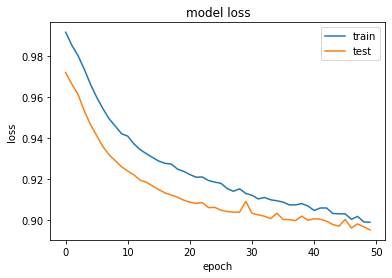

In [81]:
# Plotting the loss of the model
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [82]:
# Storing the predicted values of the whole data set by using the defined autoencoder
predictions = autoencoder.predict(data)

# Saving it in a datagrame
predictions = pd.DataFrame(predictions, columns = cols_PCA)
predictions.head(5)

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
0,-0.00000,-0.000000,-0.000000,-0.0,-0.000000,-0.000000,0.007930,-0.000000,0.012714,-0.000000
1,3.85866,4.587618,4.024248,-0.0,6.953444,-0.000000,1.108757,1.685467,4.923286,2.644399
2,-0.00000,-0.000000,-0.000000,-0.0,0.175205,-0.000000,0.050837,-0.000000,0.296567,-0.000000
3,-0.00000,-0.000000,-0.000000,-0.0,-0.000000,-0.000000,0.011235,-0.000000,0.050560,-0.000000
4,-0.00000,0.022969,0.052074,-0.0,-0.000000,24.531673,-0.000000,-0.000000,-0.000000,-0.000000


In [83]:
predictions.shape

(1070994, 10)

In [84]:
# Calculating the 2nd Fraud score by using euclidean distance
# We squared the difference between z scaled PCA values and the autoencoder predicted values
# Then, we calculated the square root of the sum of the difference of these values to get the final fraud score 2

PCA_cols = ['PCA'+str(i) for i in range(1,11)]

autoencod = pd.DataFrame(0, index=np.arange(len(predictions)), columns=PCA_cols)

for i in range(0,10):
    autoencod.iloc[:,i] = (predictions.iloc[:,i]-Zscaled_PCA_df.iloc[:,i])**2
    

autoencod['Fraud Score 2'] = autoencod[PCA_cols].sum(axis = 1)**(1/2)

autoencod.head(5)

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,Fraud Score 2
0,0.001847,0.006072,0.001959,0.000264,0.010240,0.010365,0.001196,0.000152,0.003990,0.000465,0.191180
1,3.247474,24.298632,0.724063,2.546070,8.453549,24.508637,6.693315,3.286599,141.230101,0.001110,14.662522
2,0.000054,0.007580,0.000553,0.008642,0.050070,0.001022,0.009916,0.001629,0.056992,0.001521,0.371456
3,0.002469,0.005752,0.005996,0.005174,0.003593,0.002572,0.012391,0.000012,0.023164,0.000370,0.247978
4,95.281075,22.203446,8.437611,80.866170,2.224413,9.305181,133.297920,63.061600,2.864454,18.617802,20.884436


In [85]:
# Saving the fraud score 2 in the dataframe
df_score2 = pd.merge(df_score1.iloc[:,1:], autoencod.iloc[:,-1], left_index=True, right_index=True)

In [86]:
df_score2.head(5)

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,R1_average_R1_gZIP,R2_average_R2_gZIP,R3_average_R3_gZIP,R4_average_R4_gZIP,R5_average_R5_gZIP,R6_average_R6_gZIP,R7_average_R7_gZIP,R8_average_R8_gZIP,R9_average_R9_gZIP,R1_average_R1_gZIP3,R2_average_R2_gZIP3,R3_average_R3_gZIP3,R4_average_R4_gZIP3,R5_average_R5_gZIP3,R6_average_R6_gZIP3,R7_average_R7_gZIP3,R8_average_R8_gZIP3,R9_average_R9_gZIP3,R1_average_R1_gTAXCLASS,R2_average_R2_gTAXCLASS,R3_average_R3_gTAXCLASS,R4_average_R4_gTAXCLASS,R5_average_R5_gTAXCLASS,R6_average_R6_gTAXCLASS,R7_average_R7_gTAXCLASS,R8_average_R8_gTAXCLASS,R9_average_R9_gTAXCLASS,R1_average_R1_gB,R2_average_R2_gB,R3_average_R3_gB,R4_average_R4_gB,R5_average_R5_gB,R6_average_R6_gB,R7_average_R7_gB,R8_average_R8_gB,R9_average_R9_gB,R1_average_R1_gAll,R2_average_R2_gAll,R3_average_R3_gAll,R4_average_R4_gAll,R5_average_R5_gAll,R6_average_R6_gAll,R7_average_R7_gAll,R8_average_R8_gAll,R9_average_R9_gAll,Fraud Score 1,Fraud Score 2
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500.0,1046.0,NaN,4.0,21400000.0,4225500.0,9630000.0,4225500.0,9630000.0,4600.0,1 LIBERTY ISLAND,10004,X3,382.0,318.0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR,0.132606,0.440920,0.322414,0.183988,0.384673,0.166388,0.146115,0.474799,0.338662,0.109540,0.308468,0.260520,0.216420,0.490436,0.256811,0.186693,0.521118,0.416624,0.186694,0.204512,0.097932,0.203730,0.126685,0.053077,0.186558,0.194281,0.094752,0.112427,0.317461,0.270552,0.224860,0.512207,0.272549,0.192715,0.542278,0.439817,0.119039,0.290093,0.155256,0.728226,0.788544,0.363666,0.600587,1.048116,0.575614,0.194505,0.191180
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27.0,355.0,NaN,1.0,193800000.0,14310000.0,87210000.0,14310000.0,87210000.0,4600.0,1 ELLIS ISLAND,10004,X3,382.0,318.0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR,65.525689,3.993003,11.679204,33.998569,1.302725,2.253945,72.201394,4.299811,12.267776,54.128221,2.793507,9.437162,39.991579,1.660900,3.478840,92.252462,4.719281,15.091908,92.252635,1.852077,3.547528,37.646638,0.429028,0.719000,92.185622,1.759427,3.432329,55.554558,2.874953,9.800572,41.551103,1.734632,3.692044,95.228104,4.910909,15.932063,58.821734,2.627102,5.624045,134.566543,2.670469,4.926343,296.773816,9.491816,20.851196,21.571417,14.662522
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709.0,564.0,E,3.0,104686000.0,39008700.0,47108700.0,39008700.0,47108700.0,2191.0,MARGINAL STREET,10004,X1,709.0,564.0,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR,0.848425,0.655239,0.638840,2.221515,1.078797,0.622170,0.934861,0.705585,0.671034,0.700850,0.458405,0.516203,2.613107,1.375405,0.960285,1.194482,0.774419,0.825511,1.194484,0.303920,0.194046,2.459885,0.355281,0.198470,1.193616,0.288716,0.187745,0.719319,0.471770,0.536081,2.715008,1.436462,1.019137,1.233010,0.805864,0.871467,0.761622,0.431099,0.307629,8.792770,2.211437,1.359848,3.842618,1.557576,1.140538,0.558818,0.371456
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793.0,551.0,NaN,2.0,39200000.0,15255000.0,17640000.0,15255000.0,17640000.0,2191.0,PIER 6,10004,X1,85.0,551.0,13644000.0,15750000.0,13644000.0,15750000.0,NaN,FINAL,2010/11,AC-TR,0.290744,2.094845,3.063624,0.795061,3.602014,3.116060,0.320365,2.255805,3.218015,0.240173,1.465554,2.475504,0.935209,4.592361,4.809467,0.409334,2.475871,3.958826,0.409335,0.971653,0.930568,0.880372,1.186254,0.994011,0.409037,0.923046,0.900350,0.246501,1.508284,2.570832,0.971678,4.796228,5.104220,0.422537,2.576405,4.179211,0.260998,1.378254,1.475269,3.146857,7.383803,6.810629,1.316816,4.979681,5.469571,0.277605,0.247978
4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323.0,1260.0,NaN,1.0,272300000.0,121050000.0,122535000.0,121050000.0,122535000.0,2231.0,BATTERY PARK,10004,X1,89.0,57.0,106348680.0,107758350.0,106348680.

## 5. Calculating Final Fraud Rank

In [87]:
# Creating a backup copy of the dataframe, can be used to refresh the dataset if required
df_fraud = df_score2.copy()

In [88]:
# Calculating rank of each row based on Fraud Score 1 with highest value getting the lowest rank
df_fraud['Rank_Fraud Score 1'] = df_fraud['Fraud Score 1'].rank(ascending=True, method='first')

df_fraud.head(5)

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,R1_average_R1_gZIP,R2_average_R2_gZIP,R3_average_R3_gZIP,R4_average_R4_gZIP,R5_average_R5_gZIP,R6_average_R6_gZIP,R7_average_R7_gZIP,R8_average_R8_gZIP,R9_average_R9_gZIP,R1_average_R1_gZIP3,R2_average_R2_gZIP3,R3_average_R3_gZIP3,R4_average_R4_gZIP3,R5_average_R5_gZIP3,R6_average_R6_gZIP3,R7_average_R7_gZIP3,R8_average_R8_gZIP3,R9_average_R9_gZIP3,R1_average_R1_gTAXCLASS,R2_average_R2_gTAXCLASS,R3_average_R3_gTAXCLASS,R4_average_R4_gTAXCLASS,R5_average_R5_gTAXCLASS,R6_average_R6_gTAXCLASS,R7_average_R7_gTAXCLASS,R8_average_R8_gTAXCLASS,R9_average_R9_gTAXCLASS,R1_average_R1_gB,R2_average_R2_gB,R3_average_R3_gB,R4_average_R4_gB,R5_average_R5_gB,R6_average_R6_gB,R7_average_R7_gB,R8_average_R8_gB,R9_average_R9_gB,R1_average_R1_gAll,R2_average_R2_gAll,R3_average_R3_gAll,R4_average_R4_gAll,R5_average_R5_gAll,R6_average_R6_gAll,R7_average_R7_gAll,R8_average_R8_gAll,R9_average_R9_gAll,Fraud Score 1,Fraud Score 2,Rank_Fraud Score 1
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500.0,1046.0,NaN,4.0,21400000.0,4225500.0,9630000.0,4225500.0,9630000.0,4600.0,1 LIBERTY ISLAND,10004,X3,382.0,318.0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR,0.132606,0.440920,0.322414,0.183988,0.384673,0.166388,0.146115,0.474799,0.338662,0.109540,0.308468,0.260520,0.216420,0.490436,0.256811,0.186693,0.521118,0.416624,0.186694,0.204512,0.097932,0.203730,0.126685,0.053077,0.186558,0.194281,0.094752,0.112427,0.317461,0.270552,0.224860,0.512207,0.272549,0.192715,0.542278,0.439817,0.119039,0.290093,0.155256,0.728226,0.788544,0.363666,0.600587,1.048116,0.575614,0.194505,0.191180,730212.0
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27.0,355.0,NaN,1.0,193800000.0,14310000.0,87210000.0,14310000.0,87210000.0,4600.0,1 ELLIS ISLAND,10004,X3,382.0,318.0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR,65.525689,3.993003,11.679204,33.998569,1.302725,2.253945,72.201394,4.299811,12.267776,54.128221,2.793507,9.437162,39.991579,1.660900,3.478840,92.252462,4.719281,15.091908,92.252635,1.852077,3.547528,37.646638,0.429028,0.719000,92.185622,1.759427,3.432329,55.554558,2.874953,9.800572,41.551103,1.734632,3.692044,95.228104,4.910909,15.932063,58.821734,2.627102,5.624045,134.566543,2.670469,4.926343,296.773816,9.491816,20.851196,21.571417,14.662522,1070276.0
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709.0,564.0,E,3.0,104686000.0,39008700.0,47108700.0,39008700.0,47108700.0,2191.0,MARGINAL STREET,10004,X1,709.0,564.0,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR,0.848425,0.655239,0.638840,2.221515,1.078797,0.622170,0.934861,0.705585,0.671034,0.700850,0.458405,0.516203,2.613107,1.375405,0.960285,1.194482,0.774419,0.825511,1.194484,0.303920,0.194046,2.459885,0.355281,0.198470,1.193616,0.288716,0.187745,0.719319,0.471770,0.536081,2.715008,1.436462,1.019137,1.233010,0.805864,0.871467,0.761622,0.431099,0.307629,8.792770,2.211437,1.359848,3.842618,1.557576,1.140538,0.558818,0.371456,1026383.0
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793.0,551.0,NaN,2.0,39200000.0,15255000.0,17640000.0,15255000.0,17640000.0,2191.0,PIER 6,10004,X1,85.0,551.0,13644000.0,15750000.0,13644000.0,15750000.0,NaN,FINAL,2010/11,AC-TR,0.290744,2.094845,3.063624,0.795061,3.602014,3.116060,0.320365,2.255805,3.218015,0.240173,1.465554,2.475504,0.935209,4.592361,4.809467,0.409334,2.475871,3.958826,0.409335,0.971653,0.930568,0.880372,1.186254,0.994011,0.409037,0.923046,0.900350,0.246501,1.508284,2.570832,0.971678,4.796228,5.104220,0.422537,2.576405,4.179211,0.260998,1.378254,1.475269,3.146857,7.383803,6.810629,1.316816,4.979681,5.469571,0.277605,0.247978,963335.0
4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323.0,1260.0,NaN,1.0,272300000.0,121050000.0,122535000.0,121050000.0,122535000.0,2231.0,BATTERY P

In [89]:
# Calculating rank of each row based on Fraud Score 2 with highest value getting the lowest rank
df_fraud['Rank_Fraud Score 2'] = df_fraud['Fraud Score 2'].rank(ascending=True, method='first')

df_fraud.head(5)

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,R1_average_R1_gZIP,R2_average_R2_gZIP,R3_average_R3_gZIP,R4_average_R4_gZIP,R5_average_R5_gZIP,R6_average_R6_gZIP,R7_average_R7_gZIP,R8_average_R8_gZIP,R9_average_R9_gZIP,R1_average_R1_gZIP3,R2_average_R2_gZIP3,R3_average_R3_gZIP3,R4_average_R4_gZIP3,R5_average_R5_gZIP3,R6_average_R6_gZIP3,R7_average_R7_gZIP3,R8_average_R8_gZIP3,R9_average_R9_gZIP3,R1_average_R1_gTAXCLASS,R2_average_R2_gTAXCLASS,R3_average_R3_gTAXCLASS,R4_average_R4_gTAXCLASS,R5_average_R5_gTAXCLASS,R6_average_R6_gTAXCLASS,R7_average_R7_gTAXCLASS,R8_average_R8_gTAXCLASS,R9_average_R9_gTAXCLASS,R1_average_R1_gB,R2_average_R2_gB,R3_average_R3_gB,R4_average_R4_gB,R5_average_R5_gB,R6_average_R6_gB,R7_average_R7_gB,R8_average_R8_gB,R9_average_R9_gB,R1_average_R1_gAll,R2_average_R2_gAll,R3_average_R3_gAll,R4_average_R4_gAll,R5_average_R5_gAll,R6_average_R6_gAll,R7_average_R7_gAll,R8_average_R8_gAll,R9_average_R9_gAll,Fraud Score 1,Fraud Score 2,Rank_Fraud Score 1,Rank_Fraud Score 2
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500.0,1046.0,NaN,4.0,21400000.0,4225500.0,9630000.0,4225500.0,9630000.0,4600.0,1 LIBERTY ISLAND,10004,X3,382.0,318.0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR,0.132606,0.440920,0.322414,0.183988,0.384673,0.166388,0.146115,0.474799,0.338662,0.109540,0.308468,0.260520,0.216420,0.490436,0.256811,0.186693,0.521118,0.416624,0.186694,0.204512,0.097932,0.203730,0.126685,0.053077,0.186558,0.194281,0.094752,0.112427,0.317461,0.270552,0.224860,0.512207,0.272549,0.192715,0.542278,0.439817,0.119039,0.290093,0.155256,0.728226,0.788544,0.363666,0.600587,1.048116,0.575614,0.194505,0.191180,730212.0,739409.0
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27.0,355.0,NaN,1.0,193800000.0,14310000.0,87210000.0,14310000.0,87210000.0,4600.0,1 ELLIS ISLAND,10004,X3,382.0,318.0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR,65.525689,3.993003,11.679204,33.998569,1.302725,2.253945,72.201394,4.299811,12.267776,54.128221,2.793507,9.437162,39.991579,1.660900,3.478840,92.252462,4.719281,15.091908,92.252635,1.852077,3.547528,37.646638,0.429028,0.719000,92.185622,1.759427,3.432329,55.554558,2.874953,9.800572,41.551103,1.734632,3.692044,95.228104,4.910909,15.932063,58.821734,2.627102,5.624045,134.566543,2.670469,4.926343,296.773816,9.491816,20.851196,21.571417,14.662522,1070276.0,1070196.0
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709.0,564.0,E,3.0,104686000.0,39008700.0,47108700.0,39008700.0,47108700.0,2191.0,MARGINAL STREET,10004,X1,709.0,564.0,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR,0.848425,0.655239,0.638840,2.221515,1.078797,0.622170,0.934861,0.705585,0.671034,0.700850,0.458405,0.516203,2.613107,1.375405,0.960285,1.194482,0.774419,0.825511,1.194484,0.303920,0.194046,2.459885,0.355281,0.198470,1.193616,0.288716,0.187745,0.719319,0.471770,0.536081,2.715008,1.436462,1.019137,1.233010,0.805864,0.871467,0.761622,0.431099,0.307629,8.792770,2.211437,1.359848,3.842618,1.557576,1.140538,0.558818,0.371456,1026383.0,1010745.0
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793.0,551.0,NaN,2.0,39200000.0,15255000.0,17640000.0,15255000.0,17640000.0,2191.0,PIER 6,10004,X1,85.0,551.0,13644000.0,15750000.0,13644000.0,15750000.0,NaN,FINAL,2010/11,AC-TR,0.290744,2.094845,3.063624,0.795061,3.602014,3.116060,0.320365,2.255805,3.218015,0.240173,1.465554,2.475504,0.935209,4.592361,4.809467,0.409334,2.475871,3.958826,0.409335,0.971653,0.930568,0.880372,1.186254,0.994011,0.409037,0.923046,0.900350,0.246501,1.508284,2.570832,0.971678,4.796228,5.104220,0.422537,2.576405,4.179211,0.260998,1.378254,1.475269,3.146857,7.383803,6.810629,1.316816,4.979681,5.469571,0.277605,0.247978,963335.0,956147.0
4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323.0,1260.0,NaN,1.0,272300000.0,1210500

In [90]:
# Sorting the dataframe on Fraud Score 1 to check if the pattern is similar to what we have for Fraud Score 2
# We observe that the pattern is similar for ranking based on both fraud scores
df_fraud.sort_values('Rank_Fraud Score 1', ascending = False).head(5)

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,R1_average_R1_gZIP,R2_average_R2_gZIP,R3_average_R3_gZIP,R4_average_R4_gZIP,R5_average_R5_gZIP,R6_average_R6_gZIP,R7_average_R7_gZIP,R8_average_R8_gZIP,R9_average_R9_gZIP,R1_average_R1_gZIP3,R2_average_R2_gZIP3,R3_average_R3_gZIP3,R4_average_R4_gZIP3,R5_average_R5_gZIP3,R6_average_R6_gZIP3,R7_average_R7_gZIP3,R8_average_R8_gZIP3,R9_average_R9_gZIP3,R1_average_R1_gTAXCLASS,R2_average_R2_gTAXCLASS,R3_average_R3_gTAXCLASS,R4_average_R4_gTAXCLASS,R5_average_R5_gTAXCLASS,R6_average_R6_gTAXCLASS,R7_average_R7_gTAXCLASS,R8_average_R8_gTAXCLASS,R9_average_R9_gTAXCLASS,R1_average_R1_gB,R2_average_R2_gB,R3_average_R3_gB,R4_average_R4_gB,R5_average_R5_gB,R6_average_R6_gB,R7_average_R7_gB,R8_average_R8_gB,R9_average_R9_gB,R1_average_R1_gAll,R2_average_R2_gAll,R3_average_R3_gAll,R4_average_R4_gAll,R5_average_R5_gAll,R6_average_R6_gAll,R7_average_R7_gAll,R8_average_R8_gAll,R9_average_R9_gAll,Fraud Score 1,Fraud Score 2,Rank_Fraud Score 1,Rank_Fraud Score 2
632815,632816,4018420001,4,1842,1,NaN,"864163 REALTY, LLC",D9,2,157.0,95.0,NaN,1.0,2.930000e+06,1.318500e+06,1.318500e+06,NaN,NaN,NaN,86-55 BROADWAY,11373,NaN,1.0,1.0,1.201200e+06,1.201200e+06,NaN,NaN,NaN,FINAL,2010/11,AC-TR,0.932679,3552.965339,5459.740071,11.839361,8664.281284,9225.968208,4.730309,7525.630784,8651.551054,0.192928,4453.732245,8233.528219,8.473296,30749.707266,42283.969693,1.949263,20222.218431,31165.950251,2.374901,20917.627942,85252.370375,9.574238,60709.723730,142805.971089,2.376405,20929.365242,85293.645699,0.346562,4297.315684,8529.211578,10.918825,24947.889183,45105.510052,3.143866,16116.564291,31912.758060,0.571506,4824.821074,10328.878197,7.967947,29889.494191,55138.591300,2.883423,17432.257841,38294.402650,1024.712306,1016.363220,1070994.0,1070994.0
565391,565392,3085900700,3,8590,700,NaN,U S GOVERNMENT OWNRD,V9,4,117.0,108.0,NaN,2.0,4.326304e+09,1.946837e+09,1.946837e+09,1.946837e+09,1.946837e+09,2231.0,FLATBUSH AVENUE,11234,X1,20.0,52.0,8.484847e+08,8.484847e+08,8.484847e+08,8.484847e+08,NaN,FINAL,2010/11,AC-TR,1617.350022,3990.133637,3575.629646,9968.357994,9827.199634,8897.042516,7667.182238,8900.940261,8062.175553,1402.419134,6637.164234,7103.641980,20450.178211,55620.493647,48802.454859,8400.141726,33488.225697,33377.457719,1562.156387,4829.247274,4625.047715,3885.067564,6817.613159,5712.758255,1561.021628,4587.663541,4474.858915,1402.666071,6633.316452,7094.088091,20453.624446,55324.430177,48347.475246,8402.770820,33377.941861,33151.872391,996.055534,6850.105430,7332.282745,13887.033346,42436.016445,39141.882967,5025.407821,24749.685481,27184.499848,911.209427,912.199272,1070993.0,1070993.0
917941,917942,4142600001,4,14260,1,NaN,"LOGAN PROPERTY, INC.",T1,4,4910.0,100.0,NaN,3.0,3.740199e+08,1.792809e+09,4.668309e+09,1.792809e+09,4.668309e+09,2198.0,154-68 BROOKVILLE BOULEVARD,11422,X4,37.5,56.0,1.644454e+09,4.501180e+09,1.644454e+09,4.501180e+09,NaN,FINAL,2010/11,AC-TR,7.247847,309.159692,194.077820,842.952680,5868.161765,5252.177825,1217.103627,6220.542000,5790.150710,5.476968,287.768721,192.816623,674.564884,26149.552299,15976.345830,943.984385,36520.014576,24758.283646,3.475604,206.762214,132.012997,92.072767,3109.215999,1736.893245,96.331233,5447.982161,3542.682286,1.343846,261.219163,172.820560,450.994794,16153.565176,9735.156230,338.131241,27172.689482,17935.077014,2.216100,293.284416,209.285758,329.110772,19353.216175,11900.603717,310.119810,29390.962040,21521.582668,898.999686,896.959196,1070992.0,1070992.0
1067359,1067360,5078530085,5,7853,85,NaN,NaN,B2,1,1.0,1.0,NaN,2.0,8.360000e+05,2.880000e+04,5.016000e+04,NaN,NaN,NaN,20 EMILY COURT,10307,NaN,36.0,45.0,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR,2581.804822,0.307048,0.339873,2286.478043,0.316391,0.340133,2289.618722,0.337967,0.366939,6167.378453,0.913997,0.884954,5634.379277,0.532461,0.

In [91]:
# Calculating final weighted fraud score based on the ranks and actual scores
df_fraud['Final Score'] = (df_fraud['Fraud Score 1']*df_fraud['Rank_Fraud Score 1'])+(df_fraud['Fraud Score 2']*df_fraud['Rank_Fraud Score 2'])

In [92]:
# Ranking each Final Score value with highest value having highest fraud rank
df_fraud['Final Rank'] = df_fraud['Final Score'].rank(ascending=False, method='first')

In [93]:
# Looking at the top 10 rows with highest fraud scores
df_fraud.sort_values('Final Rank', ascending = True).head(10)

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,R1_average_R1_gZIP,R2_average_R2_gZIP,R3_average_R3_gZIP,R4_average_R4_gZIP,R5_average_R5_gZIP,R6_average_R6_gZIP,R7_average_R7_gZIP,R8_average_R8_gZIP,R9_average_R9_gZIP,R1_average_R1_gZIP3,R2_average_R2_gZIP3,R3_average_R3_gZIP3,R4_average_R4_gZIP3,R5_average_R5_gZIP3,R6_average_R6_gZIP3,R7_average_R7_gZIP3,R8_average_R8_gZIP3,R9_average_R9_gZIP3,R1_average_R1_gTAXCLASS,R2_average_R2_gTAXCLASS,R3_average_R3_gTAXCLASS,R4_average_R4_gTAXCLASS,R5_average_R5_gTAXCLASS,R6_average_R6_gTAXCLASS,R7_average_R7_gTAXCLASS,R8_average_R8_gTAXCLASS,R9_average_R9_gTAXCLASS,R1_average_R1_gB,R2_average_R2_gB,R3_average_R3_gB,R4_average_R4_gB,R5_average_R5_gB,R6_average_R6_gB,R7_average_R7_gB,R8_average_R8_gB,R9_average_R9_gB,R1_average_R1_gAll,R2_average_R2_gAll,R3_average_R3_gAll,R4_average_R4_gAll,R5_average_R5_gAll,R6_average_R6_gAll,R7_average_R7_gAll,R8_average_R8_gAll,R9_average_R9_gAll,Fraud Score 1,Fraud Score 2,Rank_Fraud Score 1,Rank_Fraud Score 2,Final Score,Final Rank
632815,632816,4018420001,4,1842,1,NaN,"864163 REALTY, LLC",D9,2,157.0,95.0,NaN,1.0,2.930000e+06,1.318500e+06,1.318500e+06,NaN,NaN,NaN,86-55 BROADWAY,11373,NaN,1.0,1.0,1.201200e+06,1.201200e+06,NaN,NaN,NaN,FINAL,2010/11,AC-TR,0.932679,3552.965339,5459.740071,11.839361,8664.281284,9225.968208,4.730309,7525.630784,8651.551054,0.192928,4453.732245,8233.528219,8.473296,30749.707266,42283.969693,1.949263,20222.218431,31165.950251,2.374901,20917.627942,85252.370375,9.574238,60709.723730,142805.971089,2.376405,20929.365242,85293.645699,0.346562,4297.315684,8529.211578,10.918825,24947.889183,45105.510052,3.143866,16116.564291,31912.758060,0.571506,4824.821074,10328.878197,7.967947,29889.494191,55138.591300,2.883423,17432.257841,38294.402650,1024.712306,1016.363220,1070994.0,1070994.0,2.185980e+09,1.0
565391,565392,3085900700,3,8590,700,NaN,U S GOVERNMENT OWNRD,V9,4,117.0,108.0,NaN,2.0,4.326304e+09,1.946837e+09,1.946837e+09,1.946837e+09,1.946837e+09,2231.0,FLATBUSH AVENUE,11234,X1,20.0,52.0,8.484847e+08,8.484847e+08,8.484847e+08,8.484847e+08,NaN,FINAL,2010/11,AC-TR,1617.350022,3990.133637,3575.629646,9968.357994,9827.199634,8897.042516,7667.182238,8900.940261,8062.175553,1402.419134,6637.164234,7103.641980,20450.178211,55620.493647,48802.454859,8400.141726,33488.225697,33377.457719,1562.156387,4829.247274,4625.047715,3885.067564,6817.613159,5712.758255,1561.021628,4587.663541,4474.858915,1402.666071,6633.316452,7094.088091,20453.624446,55324.430177,48347.475246,8402.770820,33377.941861,33151.872391,996.055534,6850.105430,7332.282745,13887.033346,42436.016445,39141.882967,5025.407821,24749.685481,27184.499848,911.209427,912.199272,1070993.0,1070993.0,1.952858e+09,2.0
917941,917942,4142600001,4,14260,1,NaN,"LOGAN PROPERTY, INC.",T1,4,4910.0,100.0,NaN,3.0,3.740199e+08,1.792809e+09,4.668309e+09,1.792809e+09,4.668309e+09,2198.0,154-68 BROOKVILLE BOULEVARD,11422,X4,37.5,56.0,1.644454e+09,4.501180e+09,1.644454e+09,4.501180e+09,NaN,FINAL,2010/11,AC-TR,7.247847,309.159692,194.077820,842.952680,5868.161765,5252.177825,1217.103627,6220.542000,5790.150710,5.476968,287.768721,192.816623,674.564884,26149.552299,15976.345830,943.984385,36520.014576,24758.283646,3.475604,206.762214,132.012997,92.072767,3109.215999,1736.893245,96.331233,5447.982161,3542.682286,1.343846,261.219163,172.820560,450.994794,16153.565176,9735.156230,338.131241,27172.689482,17935.077014,2.216100,293.284416,209.285758,329.110772,19353.216175,11900.603717,310.119810,29390.962040,21521.582668,898.999686,896.959196,1070992.0,1070992.0,1.923458e+09,3.0
1067359,1067360,5078530085,5,7853,85,NaN,NaN,B2,1,1.0,1.0,NaN,2.0,8.360000e+05,2.880000e+04,5.016000e+04,NaN,NaN,NaN,20 EMILY COURT,10307,NaN,36.0,45.0,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR,2581.804822,0.307048,0.339873,2286.478043,0.316391,0.340133,2289.6187